# customer churn prediction

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

In [2]:
dataset=pd.read_csv("C:\\Users\\R S SUNEEL KRISHNA\\Downloads\\WA_Fn-UseC_-Telco-Customer-Churn.csv")
dataset.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [3]:
x=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values

In [4]:
print(x)

[['Female' 0 'Yes' ... 'Electronic check' 29.85 '29.85']
 ['Male' 0 'No' ... 'Mailed check' 56.95 '1889.5']
 ['Male' 0 'No' ... 'Mailed check' 53.85 '108.15']
 ...
 ['Female' 0 'Yes' ... 'Electronic check' 29.6 '346.45']
 ['Male' 1 'Yes' ... 'Mailed check' 74.4 '306.6']
 ['Male' 0 'No' ... 'Bank transfer (automatic)' 105.65 '6844.5']]


In [5]:
print(y)

['No' 'No' 'Yes' ... 'No' 'Yes' 'No']


In [6]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
100*dataset['Churn'].value_counts()/len(dataset['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

# data cleaning

In [8]:
dataset=dataset.copy()

In [9]:
dataset.TotalCharges = pd.to_numeric(dataset.TotalCharges,errors='coerce')
dataset.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

dataset['tenure_group'] = pd.cut(dataset.tenure, range(1, 80, 12), right=False, labels=labels)

In [11]:
dataset['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [13]:
dataset.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
dataset.head(2)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36


In [14]:
dataset.dropna(how = 'any', inplace = True)

In [15]:
dataset['Churn'] = np.where(dataset.Churn == 'Yes',1,0)

In [20]:

dataset.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


# Encoding categorical data

In [18]:
from sklearn.preprocessing import LabelEncoder

In [62]:
le=LabelEncoder()
columns_to_encode = [0, 2, 3, 4, 7, 8, 9, 10, 11, 12, 14]
for col in columns_to_encode:
    x[:, col] = le.fit_transform(x[:, col])
print(x)

[[1 0.0 1 ... 0 29.85 '29.85']
 [0 1.0 1 ... 1 56.95 '1889.5']
 [0 1.0 1 ... 0 53.85 '108.15']
 ...
 [1 0.0 1 ... 0 29.6 '346.45']
 [0 1.0 0 ... 0 74.4 '306.6']
 [1 0.0 1 ... 2 105.65 '6844.5']]


In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
columns_to_encode = [5, 6, 13,15]

ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), columns_to_encode)
    ],
    remainder='passthrough'  
)
x = ct.fit_transform(x)

x = np.array(x)
print(x[:2]) 


[[1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 1 0.0 1 0 1 1 1 0 1 0 1 0 1.0 0.0 1.0
  1.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0
  1.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0 1 0 0 2 0 0 0 0 29.85 '29.85']
 [0.0 1.0 1.0 0.0 0.0 1.0 1.0 0.0 0 1.0 1 0 0 1 0 1 1 0 0 1 0.0 1.0 0.0
  0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0
  1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1 34 0 2 0 2 0 0 1 56.95 '1889.5']]


In [47]:
print(x)

[[1.0 0.0 0.0 ... 0 29.85 '29.85']
 [0.0 1.0 1.0 ... 1 56.95 '1889.5']
 [0.0 1.0 1.0 ... 0 53.85 '108.15']
 ...
 [1.0 0.0 0.0 ... 0 29.6 '346.45']
 [0.0 1.0 0.0 ... 0 74.4 '306.6']
 [0.0 1.0 1.0 ... 2 105.65 '6844.5']]


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [54]:
print(X_test)

[[0.0 1.0 1.0 ... 1 58.2 '1045.25']
 [0.0 1.0 0.0 ... 1 116.6 '7049.5']
 [0.0 1.0 1.0 ... 0 71.95 '923.85']
 ...
 [0.0 1.0 0.0 ... 1 111.95 '6418.9']
 [0.0 1.0 0.0 ... 0 56.25 '969.85']
 [0.0 1.0 1.0 ... 0 45.8 '45.8']]


In [67]:
def convert_to_float(x):
    try:
        return float(x.strip())
    except ValueError:
        return np.nan  # or use a default value like 0

# Apply conversion to the last column
x[:, -1] = [convert_to_float(value) for value in x[:, -1]]

print(x)

[[1.0 0.0 1.0 ... 0 29.85 29.85]
 [0.0 1.0 1.0 ... 1 56.95 1889.5]
 [0.0 1.0 1.0 ... 0 53.85 108.15]
 ...
 [1.0 0.0 1.0 ... 0 29.6 346.45]
 [0.0 1.0 1.0 ... 0 74.4 306.6]
 [0.0 1.0 0.0 ... 2 105.65 6844.5]]


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [69]:
print(X_train)

[[0.0 1.0 0.0 ... 2 85.1 6155.4]
 [1.0 0.0 0.0 ... 0 46.35 672.7]
 [0.0 1.0 0.0 ... 2 24.7 1810.55]
 ...
 [0.0 1.0 0.0 ... 2 20.75 1185.95]
 [0.0 1.0 1.0 ... 0 69.75 69.75]
 [0.0 1.0 0.0 ... 0 20.4 94.5]]


# building ann

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [71]:
ann = tf.keras.models.Sequential()

In [72]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [93]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [94]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [95]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [96]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [97]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [98]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
print(y_train.dtype)  


int64


In [99]:
import numpy as np
print(X_train.dtype) 
X_train = X_train.astype(float)
print(y_train.dtype)  
y_train = y_train.astype(float)  


float64
int64


In [100]:
ann.fit(X_train, y_train, batch_size=32, epochs=100)


Epoch 1/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5989 - loss: 0.6869
Epoch 2/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7445 - loss: 0.6507
Epoch 3/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7362 - loss: 0.6286
Epoch 4/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7342 - loss: 0.6124
Epoch 5/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7308 - loss: 0.6027
Epoch 6/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7378 - loss: 0.5905
Epoch 7/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7323 - loss: 0.5888
Epoch 8/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7348 - loss: 0.5835
Epoch 9/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7270 - loss: 0.5879
Epoch 10/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7209 - loss: 0.5924
Epoch 11/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7361 - loss: 0.5782
Epoch 12/100
177/177 ━━━━━━━━━━━━━━━━━━━━

In [113]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 1]
 [0 0]
 [0 0]]


In [114]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1041    0]
 [ 368    0]]


0.7388218594748048

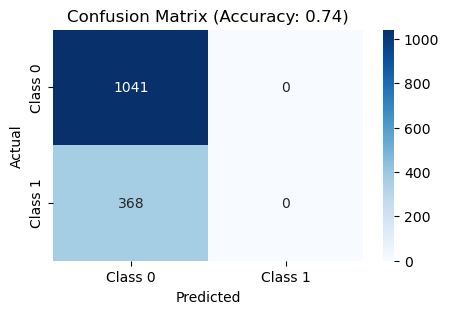

<Figure size 100x200 with 0 Axes>

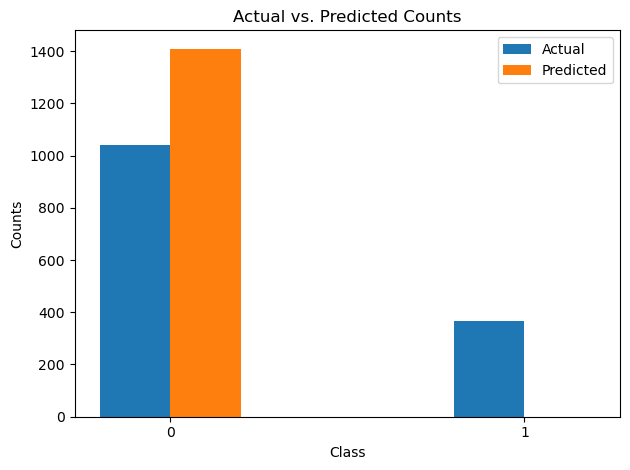

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'],  
            yticklabels=['Class 0', 'Class 1'])  
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.2f})')
plt.show()

unique_classes = np.unique(y_test)
actual_counts = np.array([np.sum(y_test == cls) for cls in unique_classes])
predicted_counts = np.array([np.sum(y_pred == cls) for cls in unique_classes])

plt.figure(figsize=(1, 2))
width = 0.2  
x = np.arange(len(unique_classes))  

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
bars2 = ax.bar(x + width/2, predicted_counts, width, label='Predicted')

ax.set_xlabel('Class')
ax.set_ylabel('Counts')
ax.set_title('Actual vs. Predicted Counts')
ax.set_xticks(x)
ax.set_xticklabels(unique_classes)
ax.legend()

fig.tight_layout()
plt.show()
